<a href="https://colab.research.google.com/github/kimminju99/Cifar-10_image_classification/blob/main/minju_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import cifar10
from matplotlib import pyplot
import tensorflow.keras.optimizers as Optimizer
from sklearn.metrics import confusion_matrix

In [2]:
def get_classlabel(class_code):
    labels =  {0:'airplane', 1: 'automobile', 2: 'bird', 3 : 'cat', 4: 'deer',5:'dog', 6:'frog',7:'horse',8:'ship',9:'truck'}

    return labels[class_code]

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [4]:
def show_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, color = 'red', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, color = 'blue', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, color = 'red', label='Training Loss')
    plt.plot(epochs_range, val_loss, color = 'blue', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("--- Training data ---")
print("Number of examples : ", x_train.shape[0])
print("Number of channels : ", x_train.shape[3])
print("Image size : ", x_train.shape[1], x_train.shape[2])

print("--- Test data ---")
print("Number of examples : ", x_test.shape[0])
print("Number of channels : ", x_test.shape[3])
print("Image size : ", x_test.shape[1], x_test.shape[2])
input_shape = x_train.shape[1:]


170500096/170498071 [==============================] - 3s 0us/step
--- Training data ---
Number of examples :  50000
Number of channels :  3
Image size :  32 32
--- Test data ---
Number of examples :  10000
Number of channels :  3
Image size :  32 32


In [6]:
label =[]
for i in range(0,50000):
  label.append(y_train[i][0])
#print(label)

label_count =[]
for i in range(0,10):
  label_count.append(label.count(i))
print("train : ", label_count)

test_label =[]
for i in range(0,10000):
  test_label.append(y_test[i][0])

test_label_count =[]
for i in range(0,10):
  test_label_count.append(test_label.count(i))
print("test : ", test_label_count)


train :  [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
test :  [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [7]:
labels = {0:'airplane', 1: 'automobile', 2: 'bird', 3 : 'cat', 4: 'deer',5:'dog', 6:'frog',7:'horse',8:'ship',9:'truck'}
#df['Index']=['airplane', 'automobile', 'bird', 'cat', 'deer','dog','frog','horse','ship','truck']
#df.columns = ['Train','Test','Name']


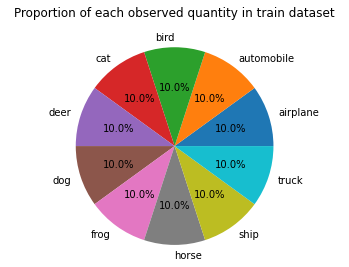

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog','horse','ship','truck']

plt.pie(label_count,
       labels = class_names,
        autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed quantity in train dataset\n')
plt.show()

In [9]:
print("mean before normalization : ", np.mean(x_train))
print("std before normalization : ", np.std(x_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(x_train.shape)
newX_test = np.ones(x_test.shape)

print(x_train.shape)
print(x_test.shape)
print(x_train[0][0][0])

for i in range(3):
    mean[i] = np.mean(x_train[:,:,:,i])
    std[i] = np.std(x_train[:,:,:,i])

for i in range(3):
    newX_train[:,:,:,i] = x_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = x_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
x_train = newX_train
x_test = newX_test

print("mean after normalization : ", np.mean(x_train))
print("std after normalization : ", np.std(x_train))
print("x_train max : ", x_train.max())

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_train[0][0][0])

mean before normalization :  120.70756512369792
std before normalization :  64.1500758911213
(50000, 32, 32, 3)
(10000, 32, 32, 3)
[59 62 63]
mean after normalization :  4.91799193961621e-17
std after normalization :  0.9999999999999996
x_train max :  2.126789409516928
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
[-1.05 -0.98 -0.76]


In [10]:
batch_size = 16
num_classes = 10
epochs = 50
learningRate = 1.5e-5

img_rows = 32 #input image dimensions
img_cols = 32 

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)

(50000, 10)
(10000, 10)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
result = {}
y = {}
loss = []
acc = []

model = keras.Sequential()

# new_model
model = keras.Sequential([
    #layer1              
    layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3)),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    #layers.Dropout(0.2),

    #layer2
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3,3)),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    #layers.Dropout(0.2),

    #layer3
    layers.Flatten(),
    layers.Dense(512),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    #layers.Dropout(0.5),
    #layer4
    layers.Dense(num_classes),
    layers.Activation('softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 64)       

In [12]:
#************** model 뒤에 숫자 넣어주기!!!!! **************
#opt = SGD(learning_rate=1e-3, momentum=0.9)
model.compile(optimizer=Optimizer.Adam(learning_rate=learningRate ), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)


Epoch 1/50
3125/3125 [==============================] - 43s 4ms/step - loss: 1.7787 - accuracy: 0.3712 - val_loss: 1.5515 - val_accuracy: 0.4471
Epoch 2/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.4618 - accuracy: 0.4827 - val_loss: 1.3957 - val_accuracy: 0.5047
Epoch 3/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.3466 - accuracy: 0.5259 - val_loss: 1.3282 - val_accuracy: 0.5253
Epoch 4/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2713 - accuracy: 0.5534 - val_loss: 1.2576 - val_accuracy: 0.5528
Epoch 5/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.2115 - accuracy: 0.5763 - val_loss: 1.2130 - val_accuracy: 0.5745
Epoch 6/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.1625 - accuracy: 0.5946 - val_loss: 1.1899 - val_accuracy: 0.5785
Epoch 7/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.1164 - accuracy: 0.6130 - val_loss: 1.1444 - val_ac

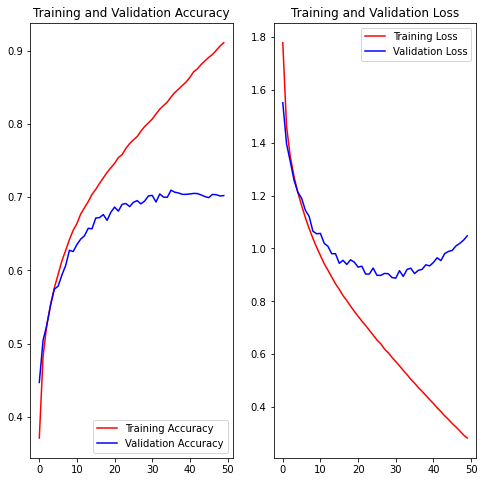

In [13]:
show_accuracy(history)

In [14]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 1.0479 - accuracy: 0.7022


[1.0479000806808472, 0.7021999955177307]

In [15]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


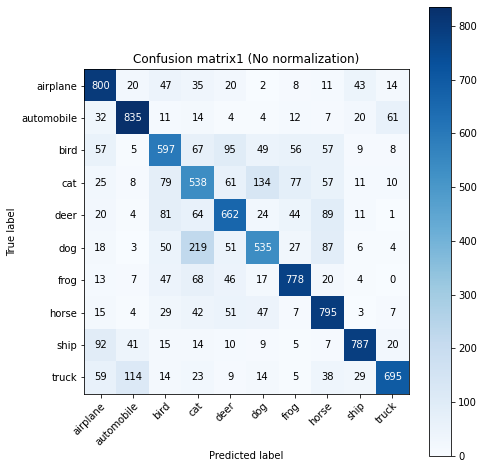

In [16]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix1 (No normalization)')

In [17]:
result = {}
y = {}
loss = []
acc = []


# new_model
model2 = keras.Sequential([
    #layer1              
    layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3)),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    #layer2
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3,3)),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    #layer3
    layers.Flatten(),
    layers.Dense(512),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    #layers.Dropout(0.5),
    #layer4
    layers.Dense(num_classes),
    layers.Activation('softmax'),
])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

In [18]:
#************** model 뒤에 숫자 넣어주기!!!!! **************
#opt = SGD(learning_rate=1e-3, momentum=0.9)
model2.compile(optimizer=Optimizer.Adam(learning_rate=learningRate ), loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)


Epoch 1/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.8903 - accuracy: 0.3210 - val_loss: 1.6475 - val_accuracy: 0.4178
Epoch 2/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5955 - accuracy: 0.4312 - val_loss: 1.4804 - val_accuracy: 0.4740
Epoch 3/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.4735 - accuracy: 0.4745 - val_loss: 1.3831 - val_accuracy: 0.5107
Epoch 4/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.3969 - accuracy: 0.5052 - val_loss: 1.3281 - val_accuracy: 0.5311
Epoch 5/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.3427 - accuracy: 0.5237 - val_loss: 1.2860 - val_accuracy: 0.5415
Epoch 6/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2999 - accuracy: 0.5434 - val_loss: 1.2477 - val_accuracy: 0.5583
Epoch 7/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2586 - accuracy: 0.5581 - val_loss: 1.2076 - val_ac

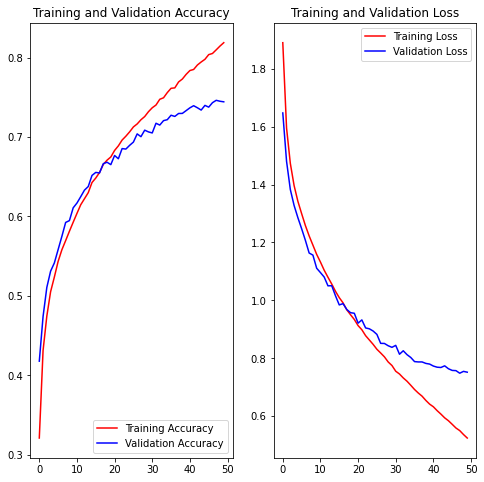

In [19]:
show_accuracy(history2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


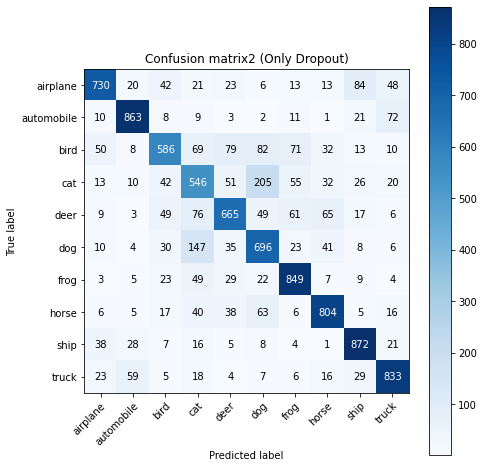

In [25]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_pred=model2.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix2 (Only Dropout)')

In [21]:
result = {}
y = {}
loss = []
acc = []


# new_model
model3 = keras.Sequential([
    #layer1              
    layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    #layer2
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3,3)),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    #layer3
    layers.Flatten(),
    layers.Dense(512),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    #layers.Dropout(0.5),
    #layer4
    layers.Dense(num_classes),
    layers.Activation('softmax'),
])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)       

In [22]:
#************** model 뒤에 숫자 넣어주기!!!!! **************
#opt = SGD(learning_rate=1e-3, momentum=0.9)
model3.compile(optimizer=Optimizer.Adam(learning_rate=learningRate ), loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)


Epoch 1/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.7810 - accuracy: 0.3506 - val_loss: 1.4592 - val_accuracy: 0.4778
Epoch 2/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.4655 - accuracy: 0.4752 - val_loss: 1.3455 - val_accuracy: 0.5213
Epoch 3/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.3516 - accuracy: 0.5177 - val_loss: 1.2766 - val_accuracy: 0.5461
Epoch 4/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2704 - accuracy: 0.5498 - val_loss: 1.1954 - val_accuracy: 0.5753
Epoch 5/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1998 - accuracy: 0.5767 - val_loss: 1.1291 - val_accuracy: 0.6030
Epoch 6/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1418 - accuracy: 0.6002 - val_loss: 1.1087 - val_accuracy: 0.6109
Epoch 7/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.0950 - accuracy: 0.6170 - val_loss: 1.0270 - val_ac

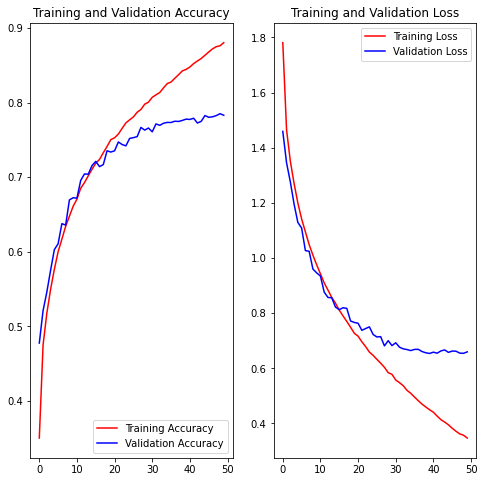

In [23]:
show_accuracy(history3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


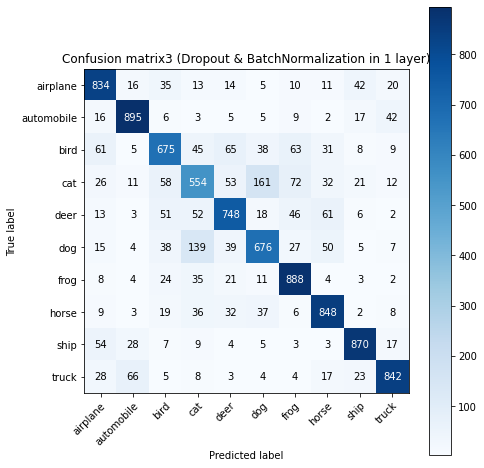

In [26]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_pred=model3.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix3 (Dropout & BatchNormalization in 1 layer)')